In [1]:
# https://github.com/ageron/handson-ml

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
# 데이터 적재
oecd_bli=pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp_per_capita=pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values="n/a")

In [5]:
# 데이터 준비
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

In [6]:
# 선형 모델 선택
from sklearn import linear_model
model=sklearn.linear_model.LinearRegression()

In [7]:
# 모델 훈련
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X_new=[[22587]]
print(model.predict(X_new))

[[5.96242338]]


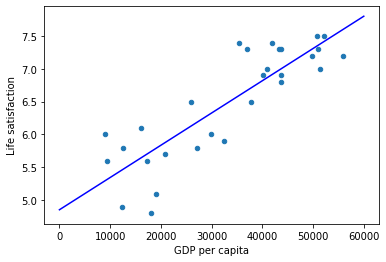

In [9]:
# 데이터 시각화
country_stats.plot(kind='scatter',x="GDP per capita",y='Life satisfaction')
t0, t1 = model.intercept_[0], model.coef_[0][0]
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.show()